In [ ]:
!pip install selenium

     |████████████████████████████████| 911kB 3.9MB/s 


In [ ]:
import numpy as np
import pandas as pd
import time
from bs4 import BeautifulSoup
from selenium import webdriver
import requests
import urllib.parse
import re
from selenium.webdriver.common.action_chains import ActionChains
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import os
%matplotlib inline

In [ ]:
# List of prominent companies selected from seven different sectors of USA stock market.
# Companies = ["General Motors", "Johnson & Johnson", "Jacobs", "Albemarle", "Disney", "AT&T", "American Airline"]
# Companies = ['Alcoa', 'Honeywell', 'American Express', 'AT&T', 'Boeing', 'Caterpillar', 'Citigroup', 'Coca-Cola', 'Dupont', 'Eastman Kodak',
#              'Exxon', 'General Electric', 'General Motors', 'Hewlett-Packard', 'The Home Depot', 'IBM', 'Intel', 'International Paper', 
#              'Johnson & Johnson', "McDonald's", 'Merck', 'Microsoft', 'MMM', 'Philip Morris', 'Procter & Gamble',
#              'CRM', 'UNH', 'Wal-Mart Stores', 'Walt Disney']
Companies = ['MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DD', 'HON', 'wba', 'GS', 'HD', 'INTC',
             'IBM', 'JNJ', 'JPM', 'MCD', 'MRK', 'MSFT', 'NKE', 'CRM', 'PG', 'TRV', 'UNH', 'AMGN', 'VZ',
             'V', 'WMT', 'DIS']

# BaseURL of Yahoo Finance website.
URL = "https://finance.yahoo.com/"

In [ ]:
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
# from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
driver.get(URL)

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:13 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: use options instead of chrome_options
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
# Created a list for each company.
Alco = []
Hone = []
Amer = []
ATT = []
Boei = []
Cate = []
Citi = []
Coca = []
Dupo = []
East = []
Exxo = []
GeneE = []
GeneM = []
Hewl = []
Home = []
IBM = []
Inte = []
InteP = []
John = []
McDo = []
Merc = []
Micr = []
Minn = []
Phil = []
Proc = []
CRM = []
UNH = []
WalM = []
Walt = []
DIS = []

# Loop created for each company name from selected companies list.
for Company in Companies:
    print("Started " + Company)
    try:
        time.sleep(3)
        # Driver enters the name of company in Yahoo Finance Searchbox.
        driver.find_element_by_xpath("//input[@placeholder = 'Search for news, symbols or companies']").send_keys(Company)
        time.sleep(4)
        # Driver clicks on Search Button.
        driver.find_element_by_xpath("//button[@id= 'header-desktop-search-button']").click()
        time.sleep(2)
        # Driver clicks on Historical Data tab.
        driver.find_element_by_xpath("//span[text() = 'Historical Data']").click()
        time.sleep(2)

        # Driver scrolls down three times to load the table.
        for i in range(0,3):
            driver.execute_script("window.scrollBy(0,5000)")
            time.sleep(2)
        
        # Page fetched by driver is parsed using BeautifulSoup, extracted table, and rows from the table.
        HTMLPage = BeautifulSoup(driver.page_source, 'html.parser')
        Table = HTMLPage.find('table', class_='W(100%) M(0)')
        Rows = Table.find_all('tr', class_='BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)')

        # Loop created for each row of table.
        for i in range(0, len(Rows)):
            MainDict = {}
            try:
                RowDict = {}
                Values = Rows[i].find_all('td')
                
                # Values (Open, High, Close etc.) are extracted and stored in dictionary.
                if len(Values) == 7:
                    MainDict["Date"] = Values[0].find('span').text.replace(',', '')
                    RowDict["Open"] = Values[1].find('span').text.replace(',', '')
                    RowDict["High"] = Values[2].find('span').text.replace(',', '')
                    RowDict["Low"] = Values[3].find('span').text.replace(',', '')
                    RowDict["Close"] = Values[4].find('span').text.replace(',', '')
                    RowDict["Adj Close"] = Values[5].find('span').text.replace(',', '')
                    RowDict["Volume"] = Values[6].find('span').text.replace(',', '')
                    MainDict["Values"] = RowDict
                    
                    # Dictionary is appended to the list of respective company.
                    if Company == "MMM":
                        Alco.append(MainDict)
                    elif Company == "AXP":
                        Hone.append(MainDict)
                    elif Company == "AAPL":
                        Amer.append(MainDict)
                    elif Company == "BA":
                        ATT.append(MainDict)
                    elif Company == "CAT":
                        Boei.append(MainDict)
                    elif Company == "CVX":
                        Cate.append(MainDict)
                    elif Company == "CSCO":
                        Citi.append(MainDict)
                    elif Company == 'KO':
                        Coca.append(MainDict)
                    elif Company == 'DD':
                        Dupo.append(MainDict)
                    elif Company == 'HON':
                        East.append(MainDict)
                    elif Company == 'wba':
                        Exxo.append(MainDict)
                    elif Company == 'GS':
                        GeneE.append(MainDict)
                    elif Company == 'HD':
                        GeneM.append(MainDict)
                    elif Company == 'INTC':
                        Hewl.append(MainDict)
                    elif Company == 'IBM':
                        Home.append(MainDict)
                    elif Company == 'JNJ':
                        IBM.append(MainDict)
                    elif Company == 'JPM':
                        Inte.append(MainDict)
                    elif Company == 'MCD':
                        InteP.append(MainDict)
                    elif Company == 'MRK':
                        John.append(MainDict)
                    elif Company == "MSFT":
                        McDo.append(MainDict)
                    elif Company == 'NKE':
                        Merc.append(MainDict)
                    elif Company == 'CRM':
                        Micr.append(MainDict)
                    elif Company == 'PG':
                        Minn.append(MainDict)
                    elif Company == 'TRV':
                        Phil.append(MainDict)
                    elif Company == 'UNH':
                        Proc.append(MainDict)
                    elif Company == 'AMGN':
                        CRM.append(MainDict)
                    elif Company == 'VZ':
                        UNH.append(MainDict)
                    elif Company == 'V':
                        WalM.append(MainDict)
                    elif Company == 'WMT':
                        Walt.append(MainDict)
                    elif Company == 'DIS':
                        DIS.append(MainDict)
                    
            except:
                # To check the exception caused for which company.
                print(Company + "  " + str(i))
            finally:
                i = i + 1
    except:
        print("Exception for " + Company)
        
# Closed driver as the operation is completed.
driver.close()

Started MMM
Started AXP
Started AAPL
Started BA
Started CAT
Started CVX
Started CSCO
Started KO
Started DD
Started HON
Started wba
Started GS
Started HD
Started INTC
Started IBM
Started JNJ
Started JPM
Started MCD
Started MRK
Started MSFT
Started NKE
Started CRM
Started PG
Started TRV
Started UNH
Started AMGN
Started VZ
VZ  0
Started V
V  0
Started WMT
WMT  0
Started DIS
DIS  0


In [ ]:
# # Created a list for each company.
# Alco = []
# Hone = []
# Amer = []
# ATT = []
# Boei = []
# Cate = []
# Citi = []
# Coca = []
# Dupo = []
# East = []
# Exxo = []
# GeneE = []
# GeneM = []
# Hewl = []
# Home = []
# IBM = []
# Inte = []
# InteP = []
# John = []
# McDo = []
# Merc = []
# Micr = []
# Minn = []
# Phil = []
# Proc = []
# CRM = []
UNH = []
WalM = []
Walt = []
DIS = []

Companies = ['VZ', 'V', 'WMT', 'DIS']
# Loop created for each company name from selected companies list.
for Company in Companies:
    print("Started " + Company)
    try:
        time.sleep(3)
        # Driver enters the name of company in Yahoo Finance Searchbox.
        driver.find_element_by_xpath("//input[@placeholder = 'Search for news, symbols or companies']").send_keys(Company)
        time.sleep(4)
        # Driver clicks on Search Button.
        driver.find_element_by_xpath("//button[@id= 'header-desktop-search-button']").click()
        time.sleep(2)
        # Driver clicks on Historical Data tab.
        driver.find_element_by_xpath("//span[text() = 'Historical Data']").click()
        time.sleep(2)

        # Driver scrolls down three times to load the table.
        for i in range(0,3):
            driver.execute_script("window.scrollBy(0,5000)")
            time.sleep(2)
        
        # Page fetched by driver is parsed using BeautifulSoup, extracted table, and rows from the table.
        HTMLPage = BeautifulSoup(driver.page_source, 'html.parser')
        Table = HTMLPage.find('table', class_='W(100%) M(0)')
        Rows = Table.find_all('tr', class_='BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)')

        # Loop created for each row of table.
        for i in range(0, len(Rows)):
            MainDict = {}
            try:
                RowDict = {}
                Values = Rows[i].find_all('td')
                
                # Values (Open, High, Close etc.) are extracted and stored in dictionary.
                if len(Values) == 7:
                    MainDict["Date"] = Values[0].find('span').text.replace(',', '')
                    RowDict["Open"] = Values[1].find('span').text.replace(',', '')
                    RowDict["High"] = Values[2].find('span').text.replace(',', '')
                    RowDict["Low"] = Values[3].find('span').text.replace(',', '')
                    RowDict["Close"] = Values[4].find('span').text.replace(',', '')
                    RowDict["Adj Close"] = Values[5].find('span').text.replace(',', '')
                    RowDict["Volume"] = Values[6].find('span').text.replace(',', '')
                    MainDict["Values"] = RowDict
                    
                    # Dictionary is appended to the list of respective company.
                    if Company == "MMM":
                        Alco.append(MainDict)
                    elif Company == "AXP":
                        Hone.append(MainDict)
                    elif Company == "AAPL":
                        Amer.append(MainDict)
                    elif Company == "BA":
                        ATT.append(MainDict)
                    elif Company == "CAT":
                        Boei.append(MainDict)
                    elif Company == "CVX":
                        Cate.append(MainDict)
                    elif Company == "CSCO":
                        Citi.append(MainDict)
                    elif Company == 'KO':
                        Coca.append(MainDict)
                    elif Company == 'DD':
                        Dupo.append(MainDict)
                    elif Company == 'HON':
                        East.append(MainDict)
                    elif Company == 'wba':
                        Exxo.append(MainDict)
                    elif Company == 'GS':
                        GeneE.append(MainDict)
                    elif Company == 'HD':
                        GeneM.append(MainDict)
                    elif Company == 'INTC':
                        Hewl.append(MainDict)
                    elif Company == 'IBM':
                        Home.append(MainDict)
                    elif Company == 'JNJ':
                        IBM.append(MainDict)
                    elif Company == 'JPM':
                        Inte.append(MainDict)
                    elif Company == 'MCD':
                        InteP.append(MainDict)
                    elif Company == 'MRK':
                        John.append(MainDict)
                    elif Company == "MSFT":
                        McDo.append(MainDict)
                    elif Company == 'NKE':
                        Merc.append(MainDict)
                    elif Company == 'CRM':
                        Micr.append(MainDict)
                    elif Company == 'PG':
                        Minn.append(MainDict)
                    elif Company == 'TRV':
                        Phil.append(MainDict)
                    elif Company == 'UNH':
                        Proc.append(MainDict)
                    elif Company == 'AMGN':
                        CRM.append(MainDict)
                    elif Company == 'VZ':
                        UNH.append(MainDict)
                    elif Company == 'V':
                        WalM.append(MainDict)
                    elif Company == 'WMT':
                        Walt.append(MainDict)
                    elif Company == 'DIS':
                        DIS.append(MainDict)
                    
            except:
                # To check the exception caused for which company.
                print(Company + "  " + str(i))
            finally:
                i = i + 1
    except:
        print("Exception for " + Company)
        
# Closed driver as the operation is completed.
driver.close()

Started VZ
Started V
Started WMT
Started DIS


In [ ]:
# Function to get a dictionary using date from the list of dictionaries.
def search(value, dictionary):
    return [element for element in dictionary if element['Date'] == value]

startdate = datetime.date(2021, 4, 15)
df = []

# Considered data of last 180 days.
for i in range(-349, 1):
    try:
        row = {}
        date = startdate + pd.DateOffset(days= i)
        date = date.strftime('%b %d %Y')

        # these variables has the values for each date.
        # print(date)
        # print(search(date, GM))
        # gm = search(date, GM)[0]
        # jnsn = search(date, Johnson)[0]
        # jcb = search(date, Jacobs)[0]
        # alber = search(date, Albemarle)[0]
        # dsny = search(date, Disney)[0]
        # att = search(date, ATT)[0]
        # aal = search(date, AA)[0]

        Alco1 = search(date, Alco)[0]
        Hone1 = search(date, Hone)[0]
        Amer1 = search(date, Amer)[0]
        ATT1 = search(date, ATT)[0]
        Boei1 = search(date, Boei)[0]
        Cate1 = search(date, Cate)[0]
        Citi1 = search(date, Citi)[0]
        Coca1 = search(date, Coca)[0]
        Dupo1 = search(date, Dupo)[0]
        East1 = search(date, East)[0]
        Exxo1 = search(date, Exxo)[0]
        GeneE1 = search(date, GeneE)[0]
        GeneM1 = search(date, GeneM)[0]
        Hewl1 = search(date, Hewl)[0]
        Home1 = search(date, Home)[0]
        IBM1 = search(date, IBM)[0]
        Inte1 = search(date, Inte)[0]
        InteP1 = search(date, InteP)[0]
        John1 = search(date, John)[0]
        McDo1 = search(date, McDo)[0]
        Merc1 = search(date, Merc)[0]
        Micr1 = search(date, Micr)[0]
        Minn1 = search(date, Minn)[0]
        Phil1 = search(date, Phil)[0]
        Proc1 = search(date, Proc)[0]
        CRM1 = search(date, CRM)[0]
        UNH1 = search(date, UNH)[0]
        WalM1 = search(date, WalM)[0]
        Walt1 = search(date, Walt)[0]
        DIS1 = search(date, DIS)[0]

        # All these values of each company are stored in a dictionary
        row['date_time'] = pd.to_datetime(date)
        
        # row['gm_open'] = gm['Values']['Open']
        # row['gm_close'] = gm['Values']['Close']
        # row['gm'] = gm['Values']['Adj Close']
        
        # row['jnsn_open'] = jnsn['Values']['Open']
        # row['jnsn_close'] = jnsn['Values']['Close']
        # row['jnsn'] = jnsn['Values']['Adj Close']
        
        # row['jacobs_open'] = jcb['Values']['Open']
        # row['jacobs_close'] = jcb['Values']['Close']
        # row['jacobs'] = jcb['Values']['Adj Close']

        # row['albemarle_open'] = alber['Values']['Open']
        # row['albemarle_close'] = alber['Values']['Close']
        # row['albemarle'] = alber['Values']['Adj Close']
        
        # row['disney_open'] = dsny['Values']['Open']
        # row['disney_close'] = dsny['Values']['Close']
        # row['disney'] = dsny['Values']['Adj Close']
        
        # row['att_open'] = att['Values']['Open']
        # row['att_close'] = att['Values']['Close']
        # row['att'] = att['Values']['Adj Close']
        
        # row['aal_open'] = aal['Values']['Open']
        # row['aal_close'] = aal['Values']['Close']
        row['MMM'] = Alco1['Values']['Adj Close']
        row['AXP'] = Hone1['Values']['Adj Close']
        row['AAPL'] = Amer1['Values']['Adj Close']
        row['BA'] = ATT1['Values']['Adj Close']
        row['CAT'] = Boei1['Values']['Adj Close']
        row['CVX'] = Cate1['Values']['Adj Close']
        row['CSCO'] = Citi1['Values']['Adj Close']
        row['KO'] = Coca1['Values']['Adj Close']
        row['DWDP'] = Dupo1['Values']['Adj Close']
        row['HON'] = East1['Values']['Adj Close']
        row['wba'] = Exxo1['Values']['Adj Close']
        row['GS'] = GeneE1['Values']['Adj Close']
        row['HD'] = GeneM1['Values']['Adj Close']
        row['INTC'] = Hewl1['Values']['Adj Close']
        row['IBM'] = Home1['Values']['Adj Close']
        row['JNJ'] = IBM1['Values']['Adj Close']
        row['JPM'] = Inte1['Values']['Adj Close']
        row['MCD'] = InteP1['Values']['Adj Close']
        row['MRK'] = John1['Values']['Adj Close']
        row['MSFT'] = McDo1['Values']['Adj Close']
        row['NKE'] = Merc1['Values']['Adj Close']
        row['CRM'] = Micr1['Values']['Adj Close']
        row['PG'] = Minn1['Values']['Adj Close']
        row['TRV'] = Phil1['Values']['Adj Close']
        row['UNH'] = Proc1['Values']['Adj Close']
        row['AMGN'] = CRM1['Values']['Adj Close']
        row['VZ'] = UNH1['Values']['Adj Close']
        row['V'] = WalM1['Values']['Adj Close']
        row['WMT'] = Walt1['Values']['Adj Close']
        row['DIS'] = DIS1['Values']['Adj Close']
        
        # dictionary is appended in the list.
        df.append(row)

    except:
        # For the missing dates (Saturday, Sunday, Holidays), values of previous dates are added.
        row = df[-1].copy()
        row['date_time'] = pd.to_datetime(date)
        df.append(row)


# Converted to the dataframe and exported to csv.
df = pd.DataFrame(df)
df.to_csv("/content/stock_data.csv", index=False)

In [ ]:
df = pd.read_csv('/content/stock_data.csv')

In [ ]:
df_select = df.iloc[:245]

In [ ]:
import pandas as pd

# Load CSV data directly from the URL with pandas, the options are needed to prevent
# reading of records with key "NA" (Namibia) as NaN
data = pd.read_csv(
    "https://storage.googleapis.com/covid19-open-data/v2/main.csv", usecols=[0,1,5,15,16],
    keep_default_na=False,
    na_values=[""],
)

# NOTE: We are only downloading the last day of data, but you can download all
# the data at once if you'd like by changing the URL to:
# https://storage.googleapis.com/covid19-open-data/v2/main.csv


# Print a small snippet of the dataset
print(f"The dataset currently contains {len(data)} records, here is a sample:")
data.sample(5)

The dataset currently contains 11063220 records, here is a sample:


,key,date,country_code,aggregation_level,new_confirmed
1385419,BR_MG_315370,2020-07-08,BR,2,0.0
8141716,NL_ZH_0512,2021-01-01,NL,2,24.0
8885356,PE_LMA_0116,2020-07-05,PE,2,6.0
10017943,US_MI_26027,2021-01-18,US,2,14.0
10221567,US_MT_30111,2020-06-16,US,2,1.0


In [ ]:
processed_data = data[data['key']=='US']
# data2 = data[data['country_code']=='US']
# countries = data2[data2.aggregation_level == 0]

df_cases = processed_data.iloc[121:366]

In [ ]:
df_cases

,key,date,country_code,aggregation_level,new_confirmed
9317713,US,2020-05-01,US,0,26753.0
9317714,US,2020-05-02,US,0,31839.0
9317715,US,2020-05-03,US,0,29266.0
9317716,US,2020-05-04,US,0,16200.0
9317717,US,2020-05-05,US,0,22267.0
...,...,...,...,...,...
9317953,US,2020-12-27,US,0,145513.0
9317954,US,2020-12-28,US,0,174814.0
9317955,US,2020-12-29,US,0,199163.0
9317956,US,2020-12-30,US,0,231427.0


In [ ]:
df['new_cases'] = [0 for _ in range(df.shape[0])]

In [ ]:
tmp = {}
tmp.update(dict(zip(df['date_time'], df['new_cases'])))
tmp.update(dict(zip(df_cases['date'], df_cases['new_confirmed'])))

In [ ]:
df.head()

,date_time,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DWDP,HON,wba,GS,HD,INTC,IBM,JNJ,JPM,MCD,MRK,MSFT,NKE,CRM,PG,TRV,UNH,AMGN,VZ,V,WMT,DIS,new_cases
0,2020-05-01,143.38,86.99,71.71,133.37,108.32,84.44,39.62,44.11,44.16,134.25,39.87,173.31,213.62,56.01,115.46,144.39,90.31,178.23,75.24,172.81,84.80,156.37,114.02,94.10,280.12,224.69,54.43,174.48,120.93,105.50,0
1,2020-05-02,143.38,86.99,71.71,133.37,108.32,84.44,39.62,44.11,44.16,134.25,39.87,173.31,213.62,56.01,115.46,144.39,90.31,178.23,75.24,172.81,84.80,156.37,114.02,94.10,280.12,224.69,54.43,174.48,120.93,105.50,0
2,2020-05-03,143.38,86.99,71.71,133.37,108.32,84.44,39.62,44.11,44.16,134.25,39.87,173.31,213.62,56.01,115.46,144.39,90.31,178.23,75.24,172.81,84.80,156.37,114.02,94.10,280.12,224.69,54.43,174.48,120.93,105.50,0
3,2020-05-04,143.19,85.08,72.73,131.46,105.23,86.33,40.04,43.67,43.81,132.25,40.62,172.26,216.82,56.52,115.28,144.37,89.24,177.46,74.46,177.04,85.00,161.47,113.00,94.95,283.10,224.62,53.87,175.05,121.70,103.18,0
4,2020-05-05,142.25,85.43,73.82,125.40,106.39,87.70,40.14,43.92,43.79,131.92,40.21,174.49,220.50,57.26,116.14,145.56,89.10,174.90,75.57,178.94,86.44,163.25,113.23,94.89,288.52,229.93,54.13,177.33,122.71,101.06,0


In [ ]:
df['new_cases'] = tmp.values()
df_select = df.drop(axis=1, columns='date_time')

In [ ]:
df_select.corr()

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DWDP,HON,wba,GS,HD,INTC,IBM,JNJ,JPM,MCD,MRK,MSFT,NKE,CRM,PG,TRV,UNH,AMGN,VZ,V,WMT,DIS,new_cases
MMM,1.000000,0.930117,0.759434,0.875508,0.940557,0.571666,0.512550,0.833473,0.853755,0.909639,0.706733,0.864001,0.781142,0.289253,0.717343,0.765840,0.893703,0.795304,-0.020118,0.865942,0.816096,0.452406,0.511113,0.903993,0.868549,0.206963,0.470284,0.839054,0.529554,0.875580,-0.036005
AXP,0.930117,1.000000,0.685349,0.918332,0.957642,0.746907,0.622737,0.745349,0.889865,0.905873,0.819879,0.957887,0.612569,0.439579,0.731578,0.822911,0.975715,0.638001,-0.143100,0.816971,0.790906,0.287613,0.321411,0.942794,0.853723,0.148184,0.342216,0.845970,0.416635,0.941825,-0.135733
AAPL,0.759434,0.685349,1.000000,0.617276,0.786549,0.154041,0.158072,0.771221,0.820376,0.838924,0.391688,0.661483,0.767172,-0.150368,0.422185,0.702870,0.688984,0.815407,0.297305,0.865125,0.890669,0.717521,0.766082,0.765377,0.773097,0.250097,0.591060,0.745523,0.803549,0.773587,0.094764
BA,0.875508,0.918332,0.617276,1.000000,0.853518,0.738546,0.686930,0.717156,0.819366,0.854307,0.767900,0.867475,0.554501,0.378730,0.743951,0.693390,0.881540,0.536782,-0.075472,0.743862,0.705960,0.180323,0.286552,0.908065,0.799221,0.139875,0.337207,0.812122,0.362372,0.856750,0.042702
CAT,0.940557,0.957642,0.786549,0.853518,1.000000,0.593114,0.496789,0.784109,0.924045,0.936488,0.748811,0.939114,0.711886,0.307283,0.645620,0.820753,0.960089,0.754414,-0.097232,0.877720,0.873199,0.429730,0.482669,0.950646,0.897946,0.188598,0.399069,0.811940,0.549634,0.940187,-0.103139
CVX,0.571666,0.746907,0.154041,0.738546,0.593114,1.000000,0.844443,0.268950,0.553696,0.493847,0.858008,0.771549,0.160860,0.713323,0.686646,0.637315,0.753345,0.053308,-0.361231,0.424035,0.254946,-0.327947,-0.273893,0.640136,0.486164,0.090916,-0.096640,0.522241,-0.143606,0.670398,-0.299340
CSCO,0.512550,0.622737,0.158072,0.686930,0.496789,0.844443,1.000000,0.183921,0.510188,0.392674,0.842552,0.689171,0.252622,0.721926,0.707029,0.618120,0.645070,0.018477,-0.332122,0.468479,0.166726,-0.368933,-0.262692,0.565413,0.429677,0.297011,-0.204265,0.431131,-0.164400,0.579816,-0.319580
KO,0.833473,0.745349,0.771221,0.717156,0.784109,0.268950,0.183921,1.000000,0.711088,0.899411,0.337060,0.602860,0.701511,-0.140242,0.573517,0.551084,0.679961,0.831209,0.273327,0.678512,0.846872,0.622031,0.750104,0.756387,0.837591,0.031812,0.787623,0.820528,0.773675,0.727460,0.357476
DWDP,0.853755,0.889865,0.820376,0.819366,0.924045,0.553696,0.510188,0.711088,1.000000,0.914696,0.743589,0.909799,0.641445,0.250088,0.644391,0.859143,0.921668,0.663514,0.052771,0.812410,0.871242,0.356974,0.450129,0.929437,0.878817,0.226954,0.360094,0.749891,0.578565,0.932648,-0.122850
HON,0.909639,0.905873,0.838924,0.854307,0.936488,0.493847,0.392674,0.899411,0.914696,1.000000,0.619739,0.840823,0.677057,0.103153,0.619186,0.756980,0.893317,0.757607,0.082011,0.813054,0.933508,0.503442,0.590612,0.933370,0.931320,0.074944,0.574123,0.844237,0.718480,0.915181,0.156112


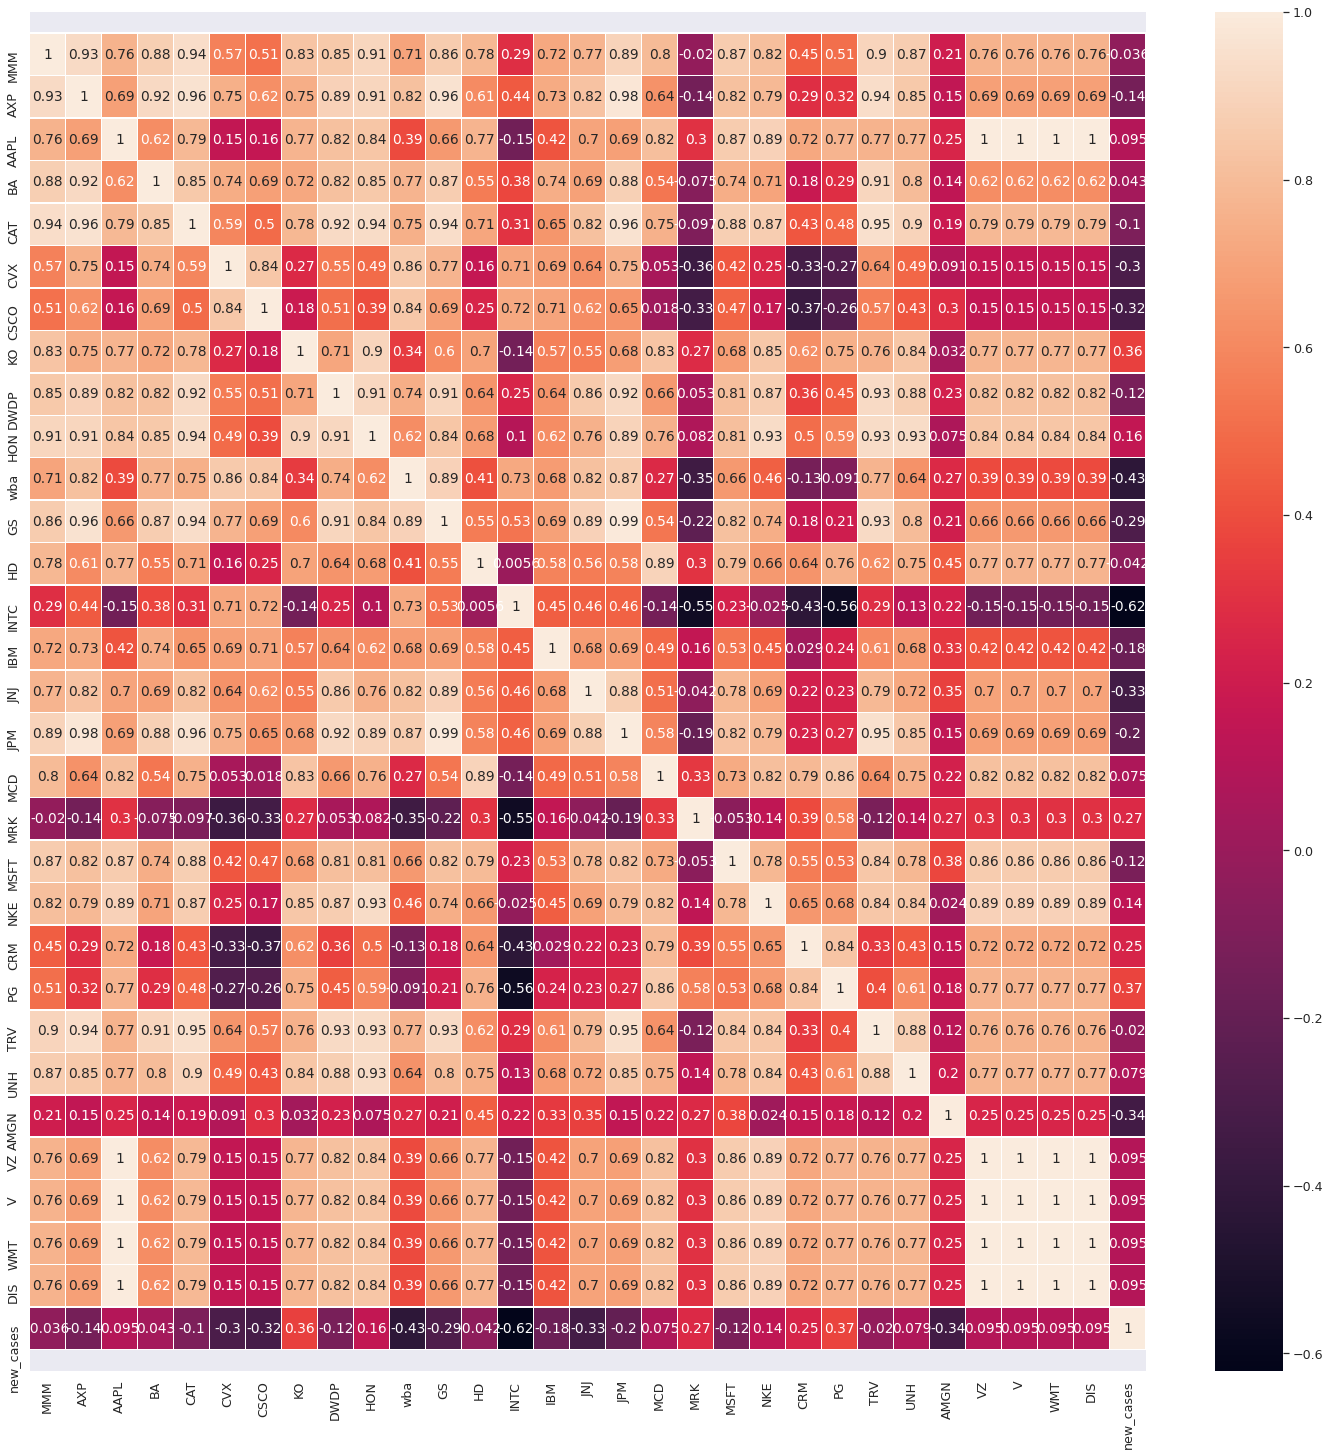

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(25,25))
sns.set(font_scale=1.15)
sns.heatmap(df_select.corr(),linewidths=.5,annot=True)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  """


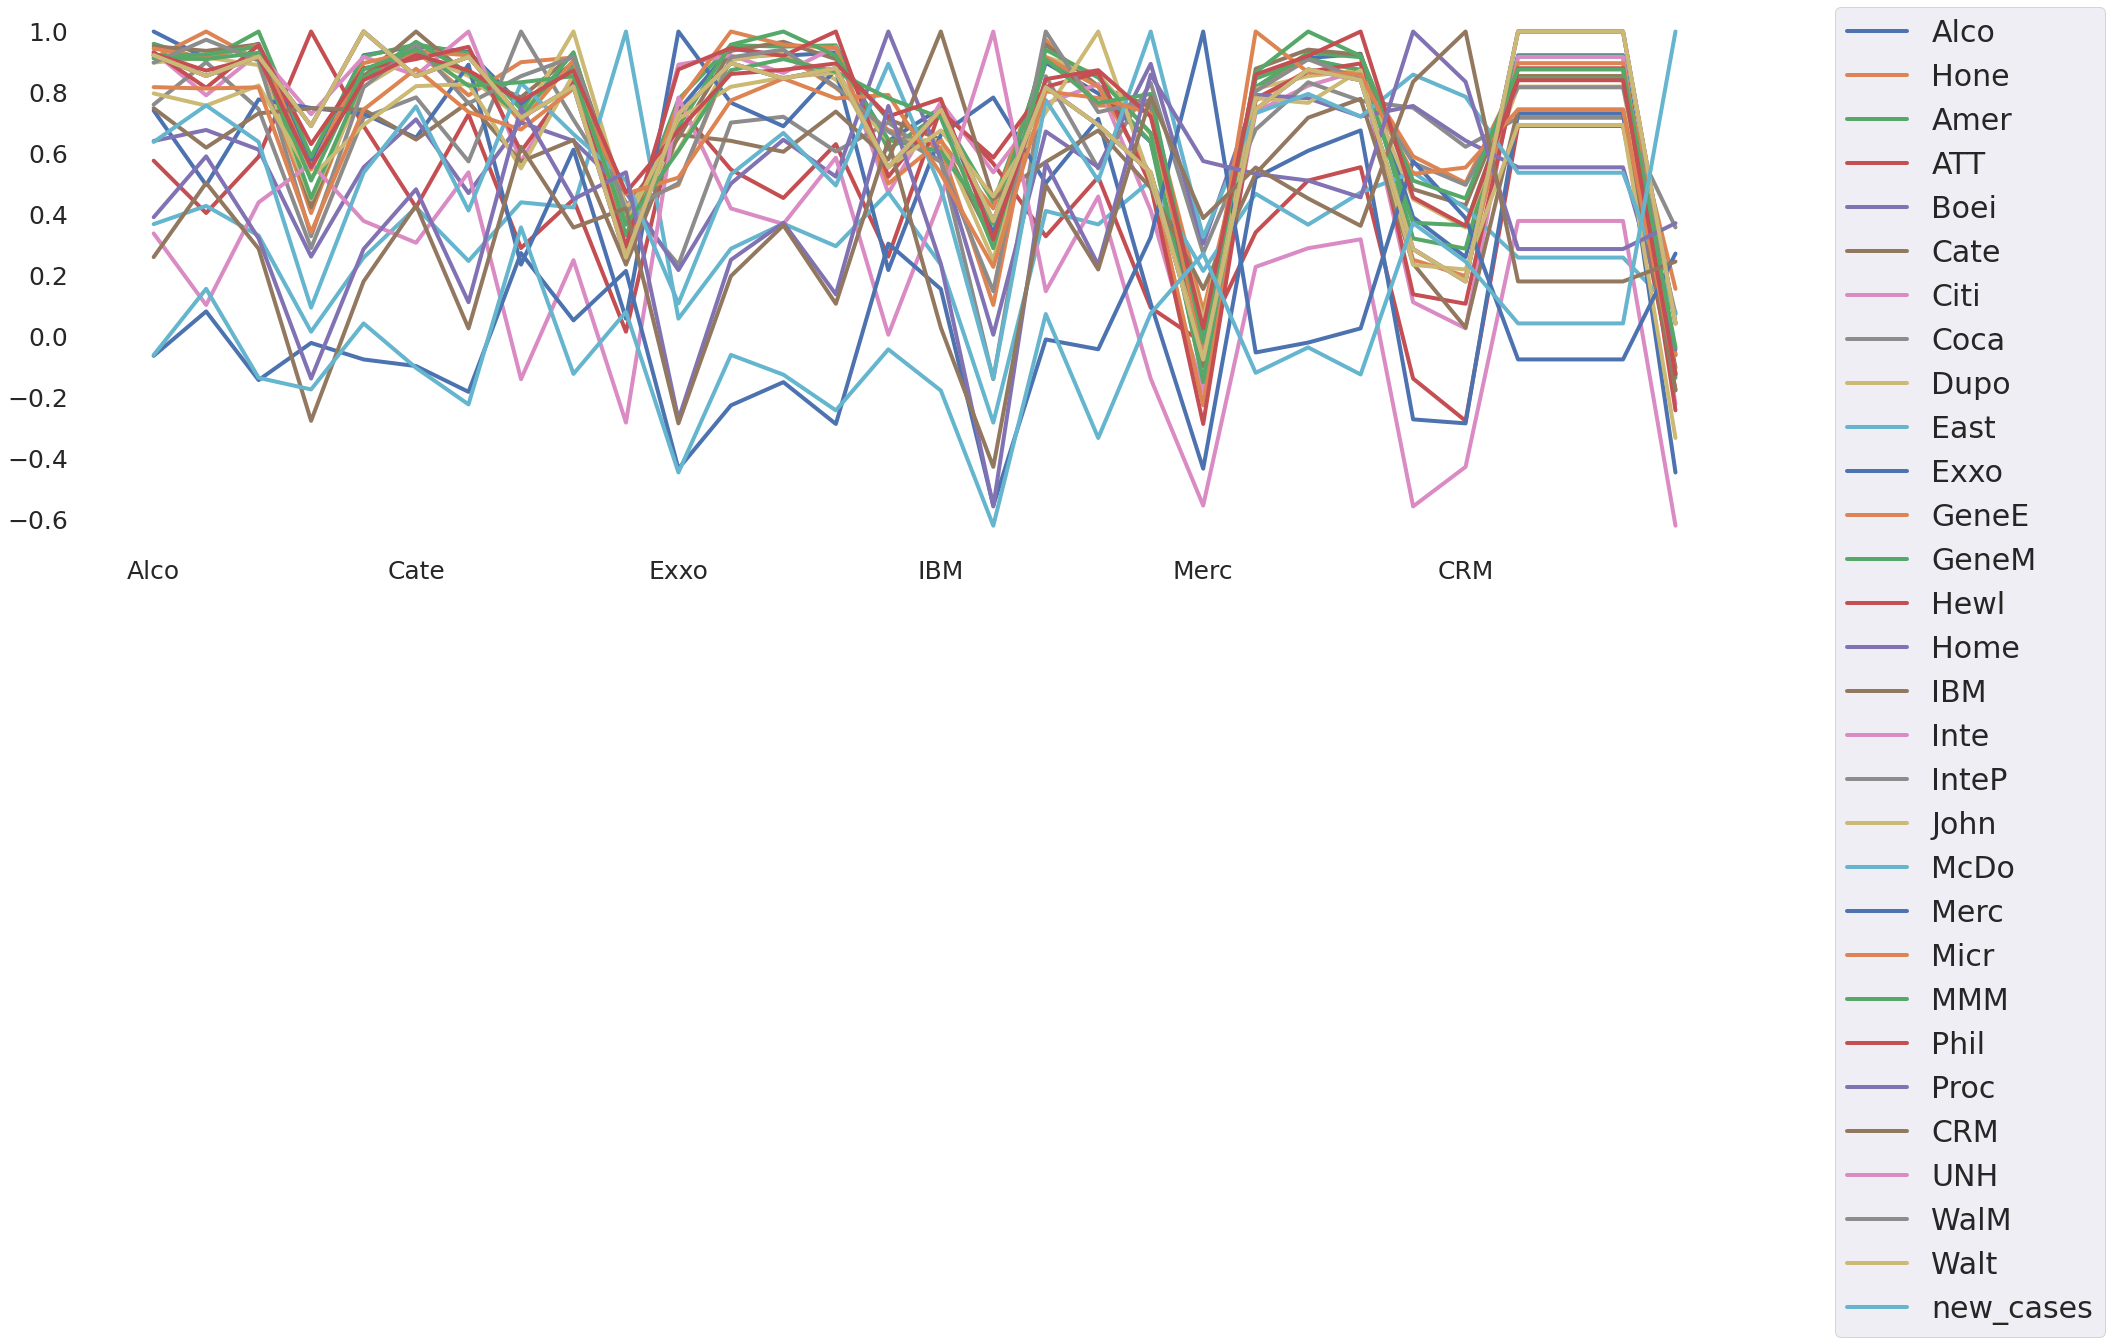

In [ ]:
sns.set(font_scale=2.5)
ax = df_select.corr().plot(figsize=(30,10),linewidth=4.0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,prop={'size': 30})
plt.tick_params(axis='both', which='major', labelsize=25)
plt.tight_layout()
ax.set_facecolor('w')

In [ ]:
# df = pd.DataFrame()

In [ ]:
# AAL = pd.read_csv('/content/AAL.csv')
# list1 = AAL['Date']
# df['Date'] = list1
# list1 = AAL['Adj Close']
# df['AAL'] = list1

In [ ]:
# ALB = pd.read_csv('/content/ALB.csv')
# list1 = ALB['Adj Close']
# df['ALB'] = list1

In [ ]:
# DIS = pd.read_csv('/content/DIS.csv')
# list1 = DIS['Adj Close']
# df['DIS'] = list1

In [ ]:
# GM = pd.read_csv('/content/GM.csv')
# list1 = GM['Adj Close']
# df['GM'] = list1

In [ ]:
# J = pd.read_csv('/content/J.csv')
# list1 = J['Adj Close']
# df['J'] = list1

In [ ]:
# JNJ = pd.read_csv('/content/JNJ.csv')
# list1 = JNJ['Adj Close']
# df['JNJ'] = list1

In [ ]:
# T = pd.read_csv('/content/T.csv')
# list1 = T['Adj Close']
# df['T'] = list1

In [ ]:
# df['new_confirmed'] = [0 for _ in range(df.shape[0])]
# tmp = {}
# tmp.update(dict(zip(df['Date'], df['new_confirmed'])))
# tmp.update(dict(zip(df_cases['date'], df_cases['new_confirmed'])))
# df['new_confirmed'] = tmp.values()

In [ ]:
# df.shape